In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline

In [4]:
def bmi_cal(bmi):
    if 18.5 > bmi:
        return ["underfat", "black"]
    if 18.5 <= bmi < 25:
        return ["healthy", "red"]
    if 25 <= bmi < 30:
        return ["overfat", "green"]
    if 30 <= bmi:
        return ["obese", "blue"]

def balance_to_colors(state):
    if state.capitalize() == "Underfat":
        return "black"
    if state.capitalize() == "Healthy":
        return "red"
    if state.capitalize() == "Overfat":
        return "green"
    if state.capitalize() == "Obese":
        return "blue"
    return "yellow"

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
plt.rcParams["figure.figsize"] = [15,10]

In [6]:
#procrustes = np.load("procrustes.np.npy")
#ids = np.load("procrustes_id.np.npy")
pro_total = np.load("procruste.npy")
procrustes = pro_total[565-115:]
del pro_total
ids = np.load("procrustes_id_reales.npy")

In [7]:
#ids = np.load("procrustes_id.np.npy")
data = pd.read_excel("./planilla_colecta.xlsx")
data = data[data['id'].isin(ids)]
sexo = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["sexo"]])[0], ids))).reshape(115)
sexo["f" == sexo] = "red"
sexo["m" == sexo] = "blue"
sexo["m " == sexo] = "blue"

In [8]:
sexo = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["sexo"]])[0], ids))).reshape(115)
peso = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["peso"]])[0], ids))).reshape(115)
altura = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["promedio altura"]])[0] / 100 , ids))).reshape(115)
balance = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["Body fat range"]])[0] , ids)), dtype=np.str).reshape(115)

In [9]:
procrustes.shape

(115, 339000, 2)

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(procrustes[0][:,0],procrustes[0][:,1],"-")
ax1.set_title("id="+ids[0])
ax2.plot(procrustes[5][:,0],procrustes[5][:,1],"-")
ax2.set_title("id="+ids[5])
ax3.plot(procrustes[6][:,0],procrustes[6][:,1],"-")
ax3.set_title("id="+ids[6])
ax4.plot(procrustes[-1][:,0],procrustes[-1][:,1],"-")
ax4.set_title("id="+ids[-1])

# MIN MAX SCALER

In [11]:
from sklearn.preprocessing import MinMaxScaler
procrustes = MinMaxScaler().fit_transform(procrustes.reshape(115, -1))
procrustes = procrustes.reshape(115, -1 , 2)

# REDUCCIÓN DE DIMENSIONALIDAD

In [12]:
from sklearn import decomposition

In [13]:
pcs = 50
pca = decomposition.PCA(n_components=pcs, svd_solver='randomized')
pca.fit(procrustes.reshape(115, -1))
print("Con n_components = {} el valor es: {} ".format(pcs, pca.explained_variance_ratio_.sum()))
x_out = pca.transform(procrustes.reshape(115, -1))

Con n_components = 50 el valor es: 0.7880379067631551 


In [14]:
"./out/torsos_smooth/model_mesh_045.ply"
"./out/torsos_smooth/model_mesh_067.ply"
"./out/torsos_smooth/model_mesh_062.ply"
"./out/torsos_smooth/model_mesh_076.ply"
"./out/torsos_smooth/model_mesh_108.ply"
"./out/torsos_smooth/model_mesh_149.ply"

'./out/torsos_smooth/model_mesh_149.ply'

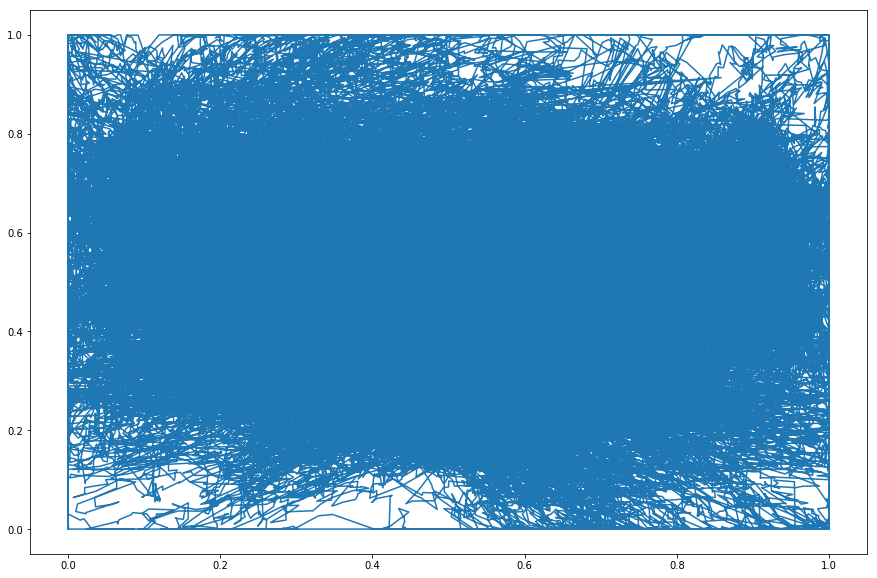

In [15]:
b = procrustes[ids == "149"]
plt.plot(b[0][:, 0], b[0][:, 1])

In [16]:
bmis = np.array(list(map( lambda pa: bmi_cal(pa[0] / (pa[1]*pa[1]))  ,zip(peso,altura))))
balance_c = np.array(list(map( lambda pa: balance_to_colors(pa),balance)))

In [17]:
sexo["f" == sexo] = "red"
sexo["m" == sexo] = "blue"
sexo["m " == sexo] = "blue"

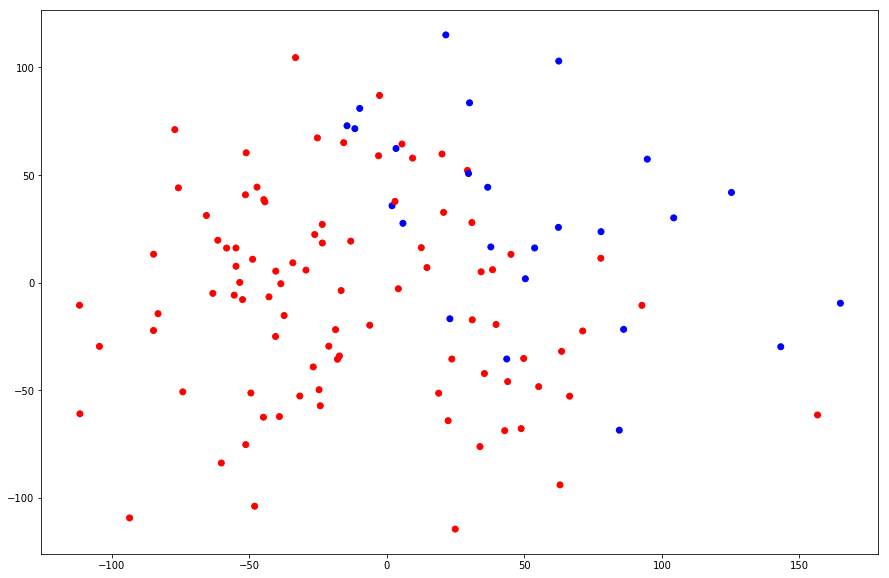

In [18]:
plt.scatter(x_out[:, 0], x_out[:, 1], c=sexo, marker="o")
# for label, x, y in zip(ids, x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

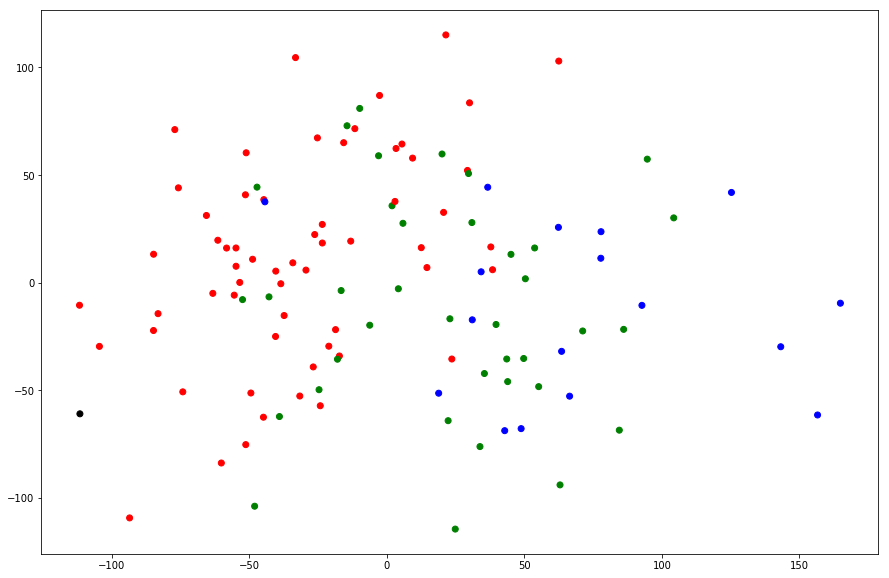

In [19]:
plt.scatter(x_out[:, 0], x_out[:, 1], c=bmis[:,1], marker="o")
# for label, x, y in zip(ids, x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

In [41]:
import sklearn

result = sklearn.cluster.k_means(x_out[:], n_clusters=2)
labels = result[1]
plt.scatter(x_out[:, 0], x_out[:, 1], c=labels, marker="o")